# 1. Import necessary packages

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

# 2. Load and prepare the dataset

In [ ]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

In [ ]:
df_train_data[9].value_counts()

1    11478
0     3022
Name: 9, dtype: int64

In [ ]:
#assign 0 class if !=1
df_train_data.loc[df_train_data[9]!=1, 9]=0

In [ ]:
#Create a DataFrame of nine features named X, drop column 9.
#Create a DataFrame of labels named y, select only column 9.
columns=df_train_data.columns
column_x=columns.drop(9)
X=df_train_data[column_x]
y = df_train_data[9]

In [ ]:
#Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=82)

# 3. Create the model

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9677241379310345

In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7922758620689655

In [ ]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[2829   43]
 [  64  689]]


In [ ]:
presision=confusion[0][0]/(confusion[0][0]+confusion[1][0])
recall=confusion[0][0]/(confusion[0][0]+confusion[0][1])
print(presision)
print(recall)

0.9778776356723125
0.9850278551532033


In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 0.97
Recall score: 0.98
F1 score: 0.98
Fbeta score favoring precision: 0.98
FBeta score favoring recall: 0.98


c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[9.99679624e-01 9.05325842e-01 9.94116509e-01 1.62555031e-01
 9.97058259e-01 9.99738183e-01 9.89355758e-01 4.43919215e-05
 9.98632172e-01 9.98511422e-01 6.25431089e-01 3.35307171e-01
 9.99968990e-01 9.92497733e-01 9.99508354e-01 9.99746775e-01
 8.54531168e-06 9.99969170e-01 9.99715057e-01 7.09239806e-02
 9.99969243e-01 9.92109264e-01 5.48086657e-14 9.99951187e-01
 9.98575113e-01 9.69798788e-01 9.99977080e-01 9.91431764e-01
 9.99672883e-01]


c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


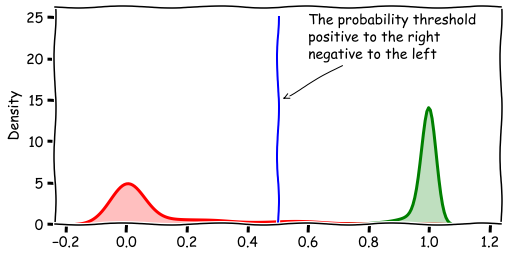

In [ ]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

[0.         0.         0.00131062 0.00131062 0.00262123 0.00262123
 0.00393185 0.00393185 0.00524246 0.00524246 0.00655308 0.00655308
 0.0078637  0.0078637  0.00917431 0.00917431 0.01048493 0.01048493
 0.01310616 0.01310616 0.01703801 0.01703801 0.02228047 0.02228047
 0.0249017  0.0249017  0.02752294 0.02752294 0.02883355]
[3.49406010e-04 9.64360587e-02 9.64360587e-02 2.19077568e-01
 2.19077568e-01 2.68693222e-01 2.68693222e-01 4.39902166e-01
 4.39902166e-01 5.03144654e-01 5.03144654e-01 6.33473096e-01
 6.33473096e-01 6.65618449e-01 6.65618449e-01 7.50524109e-01
 7.50524109e-01 9.63312369e-01 9.63312369e-01 9.63661775e-01
 9.63661775e-01 9.64011181e-01 9.64011181e-01 9.64360587e-01
 9.64360587e-01 9.73445143e-01 9.73445143e-01 9.74842767e-01
 9.74842767e-01]
[0.99999999 0.99996283 0.9999623  0.99985778 0.99985768 0.99979921
 0.99979894 0.99938375 0.99938345 0.99911098 0.99910808 0.99717026
 0.99714289 0.99591116 0.9959006  0.98980934 0.98980811 0.77936287
 0.77885137 0.77873655 0.77830

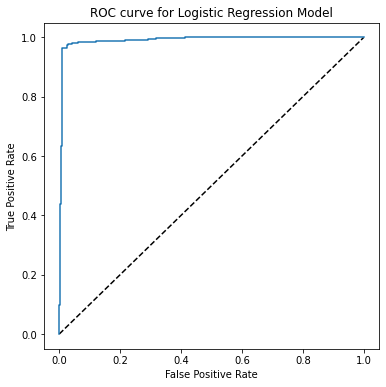

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

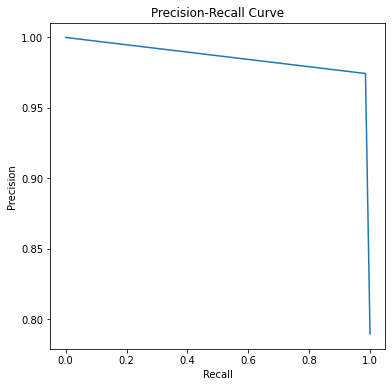

In [ ]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.96321839 0.96781609 0.96965517 0.97057471 0.96965517]
Mean cross-validation score: 0.968


# 13. Is this really linear?
Your linear classifier is not giving you better accuracy than the dummy classifier. Suppose that the data was not linearly separable. Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the logistic regression from above? What does that tell you about the data?

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=40)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=[1, 0]))
print(classification_report(y_test, y_pred))

[[2861   11]
 [  17  736]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       753
           1       0.99      1.00      1.00      2872

    accuracy                           0.99      3625
   macro avg       0.99      0.99      0.99      3625
weighted avg       0.99      0.99      0.99      3625



Text(0, 0.5, 'Mean Error')

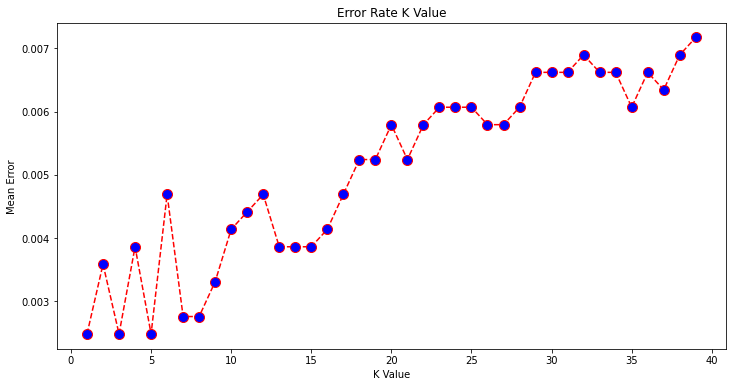

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
regressor = RandomForestRegressor(n_estimators=7, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test).astype(int)
print(confusion_matrix(y_test,y_pred, labels=[1, 0]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[2867    5]
 [   1  752]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       753
           1       1.00      1.00      1.00      2872

    accuracy                           1.00      3625
   macro avg       1.00      1.00      1.00      3625
weighted avg       1.00      1.00      1.00      3625

0.9983448275862069


In [ ]:
x=[1,2,3,4,5,6]
print(x[2::-1])

[3, 2, 1]
